In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
coffee = pd.read_csv('./working_set.csv')
coffee.head()
coffee.tail()

,Unnamed: 0,year,month,day,level_3,Title,Date,Price
1460,1460,2018,3,26,Title,Futures Review: Arabica futures fall to one mo...,3/26/18,1.1107
1461,1461,2018,3,27,Title,Futures Review: Coffee ends narrowly mixed,3/27/18,1.1262
1462,1462,2018,3,28,Title,Futures Review: Coffee moves away from recent ...,3/28/18,1.1262
1463,1463,2018,3,29,Title,"IEG Vu: Easter email alert schedule, customer ...",3/29/18,1.1239
1464,1464,2018,4,3,Title,Futures Review: Arabica coffee hits 10-month l...,4/3/18,1.1262


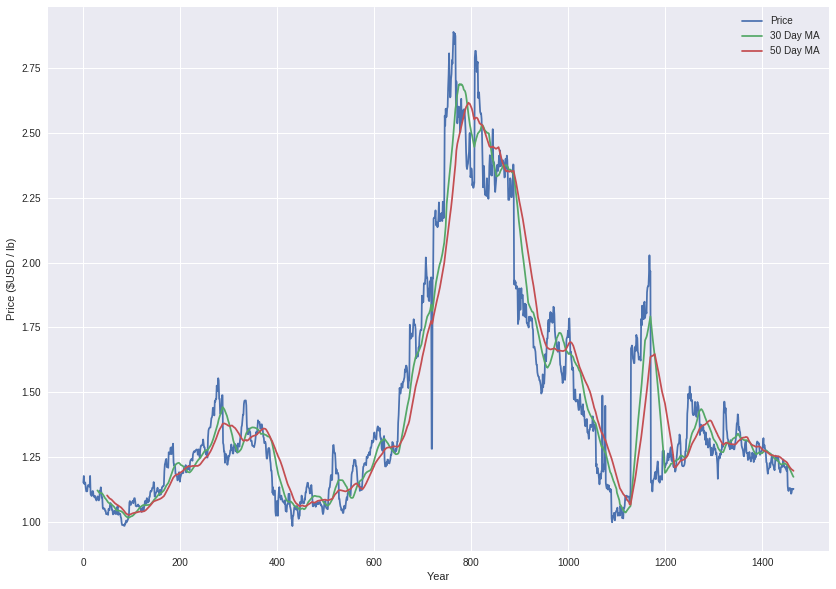

In [4]:
plt.figure(figsize = (14,10))
plt.plot(coffee['Price'], label='Price')
plt.plot(coffee['Price'].rolling(30).mean(), label='30 Day MA')
plt.plot(coffee['Price'].rolling(50).mean(), label = '50 Day MA')
plt.ylabel("Price ($USD / lb)")
plt.xlabel("Year")
plt.legend()

In [5]:




coffee['Price_Change'] = coffee['Price'].shift(1) - coffee['Price'].fillna(0)
coffee['Price_Change'] = coffee['Price_Change'] * -1
coffee.head()

,Unnamed: 0,year,month,day,level_3,Title,Date,Price,Price_Change
0,0,2007,1,2,Title,India earns more from higher coffee exports in...,1/2/07,1.1506,NaN
1,1,2007,1,3,Title,Friesland raises stake in Indonesian subsidiar...,1/3/07,1.1760,0.0254
2,2,2007,1,4,Title,Nymex announces start date for soft commodity ...,1/4/07,1.1451,-0.0309
3,3,2007,1,5,Title,India's largest coffee chain extends to Pakistan,1/5/07,1.1506,0.0055
4,4,2007,1,7,Title,Honduran coffee sales Ugandan coffee funds Soy...,1/7/07,1.1506,-0.0000


In [6]:
coffee = coffee.fillna(0)
coffee.head()

,Unnamed: 0,year,month,day,level_3,Title,Date,Price,Price_Change
0,0,2007,1,2,Title,India earns more from higher coffee exports in...,1/2/07,1.1506,0.0000
1,1,2007,1,3,Title,Friesland raises stake in Indonesian subsidiar...,1/3/07,1.1760,0.0254
2,2,2007,1,4,Title,Nymex announces start date for soft commodity ...,1/4/07,1.1451,-0.0309
3,3,2007,1,5,Title,India's largest coffee chain extends to Pakistan,1/5/07,1.1506,0.0055
4,4,2007,1,7,Title,Honduran coffee sales Ugandan coffee funds Soy...,1/7/07,1.1506,-0.0000


In [7]:
def up(row):
    for row in coffee['Price_Change']:
        if row > 0:
            return 1
        else:
            return 0
            
        

coffee['Direction'] = coffee['Price_Change'].apply(up)

In [8]:
coffee.head()

,Unnamed: 0,year,month,day,level_3,Title,Date,Price,Price_Change,Direction
0,0,2007,1,2,Title,India earns more from higher coffee exports in...,1/2/07,1.1506,0.0000,0
1,1,2007,1,3,Title,Friesland raises stake in Indonesian subsidiar...,1/3/07,1.1760,0.0254,0
2,2,2007,1,4,Title,Nymex announces start date for soft commodity ...,1/4/07,1.1451,-0.0309,0
3,3,2007,1,5,Title,India's largest coffee chain extends to Pakistan,1/5/07,1.1506,0.0055,0
4,4,2007,1,7,Title,Honduran coffee sales Ugandan coffee funds Soy...,1/7/07,1.1506,-0.0000,0


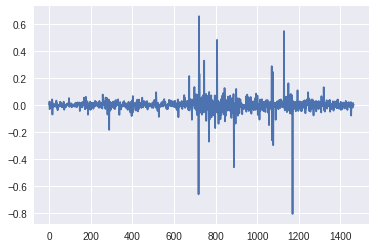

In [9]:
plt.plot(coffee['Price_Change'])

In [18]:
# # Rate of Change (ROC)
# def ROC(data,n):
#     N = coffee['Price'].diff(n)
#     D = coffee['Price'].shift(n)
#     ROC = (N/D,name='Rate of Change')
#     data = data.join(ROC)
#     return data 
 
# # Retrieve the NIFTY data from Yahoo finance:
# #data = pdr.get_data_yahoo("^NSEI", start="2015-06-01", end="2016-01-01") 
# data = coffee

# # Compute the 5-period Rate of Change for NIFTY
# n = 5
# NIFTY_ROC = ROC(data,n)
# ROC = NIFTY_ROC['Rate of Change']


In [10]:
coffee['Rate_of_Change'] = coffee['Price'].diff(1) / coffee['Price'].shift(1)
coffee.head(10)

,Unnamed: 0,year,month,day,level_3,Title,Date,Price,Price_Change,Direction,Rate_of_Change
0,0,2007,1,2,Title,India earns more from higher coffee exports in...,1/2/07,1.1506,0.0000,0,NaN
1,1,2007,1,3,Title,Friesland raises stake in Indonesian subsidiar...,1/3/07,1.1760,0.0254,0,0.022075
2,2,2007,1,4,Title,Nymex announces start date for soft commodity ...,1/4/07,1.1451,-0.0309,0,-0.026276
3,3,2007,1,5,Title,India's largest coffee chain extends to Pakistan,1/5/07,1.1506,0.0055,0,0.004803
4,4,2007,1,7,Title,Honduran coffee sales Ugandan coffee funds Soy...,1/7/07,1.1506,-0.0000,0,0.000000
5,5,2007,1,9,Title,McDonald's coffee to be certified as sustainable,1/9/07,1.1290,-0.0216,0,-0.018773
6,6,2007,1,10,Title,MILK PRODUCT PRICES IN EUROPE AND THE US Milk ...,1/10/07,1.1166,-0.0124,0,-0.010983
7,7,2007,1,14,Title,Fall in crude sees sugar hit three-month low M...,1/14/07,1.1166,-0.0000,0,0.000000
8,8,2007,1,15,Title,Coke invests in Australian operation,1/15/07,1.1166,-0.0000,0,0.000000
9,9,2007,1,16,Title,World coffee production to fall below demand i...,1/16/07,1.1364,0.0198,0,0.017732


In [11]:
coffee = coffee.fillna(0)

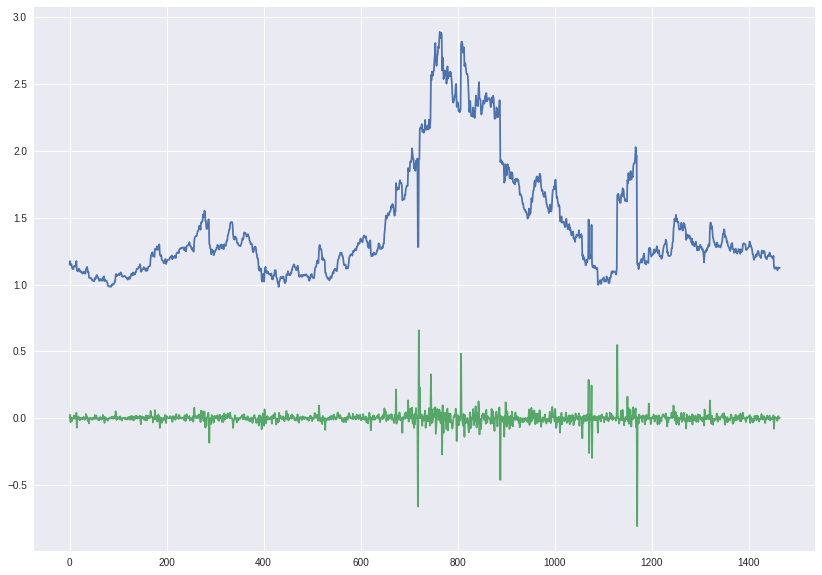

In [12]:
plt.figure(figsize = (14,10))
plt.plot(coffee['Price'])
#plt.plot(coffee['Rate_of_Change'])
plt.plot(coffee['Price_Change'])

In [13]:
coffee = coffee.to_csv('./updated_coffee_df.csv')